In [1]:
%matplotlib inline
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt, timedelta as td
from tqdm import tqdm
from rwc import controversy_score
from util import build_graph_from_df
from itertools import takewhile, count

In [2]:
dataset="mtvhottest"

In [3]:
g = nx.read_gpickle('data/{}.gpkl'.format(dataset))
df = pd.read_pickle('data/{}.pkl'.format(dataset))
if not isinstance(df['created_at'].iloc[0], pd.tslib.Timestamp):
    df['created_at'] = list(map(dt.fromtimestamp, df['created_at']))
df.set_index(['created_at'], inplace=True)

In [4]:
times = df.index

In [5]:
timediff = times.max() - times.min()

In [6]:
print('time difference: {}'.format(timediff))

time difference: 28 days 12:02:31.005000


In [7]:
time_step = td(hours=12)
time_window = td(hours=48)

In [8]:
time_zero = times.min()
multiples = list(takewhile(lambda i: (time_zero + i * time_step + time_window) <= times.max(), count(0)))
print(multiples)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [16]:
rwc_list = []
for i in tqdm(multiples):
    start_time = time_zero + i * time_step
    end_time = start_time + time_window
    sub_df = df[(df.index >= start_time) & (df.index < end_time)]
    sub_g = build_graph_from_df(sub_df)
    try:
        rwc_list.append(controversy_score(sub_g))
    except ValueError as e:
        rwc_list.append(0)
        print('For {} - {}'.format(start_time, end_time))
        print(str(e))


 35%|███▌      | 19/54 [00:00<00:00, 186.92it/s]

For 2016-07-03 17:56:14.657000 - 2016-07-05 17:56:14.657000
only contains 6 nodes, does not work for percent 0.001
For 2016-07-04 05:56:14.657000 - 2016-07-06 05:56:14.657000
only contains 4 nodes, does not work for percent 0.001
For 2016-07-04 17:56:14.657000 - 2016-07-06 17:56:14.657000
only contains 2 nodes, does not work for percent 0.001
For 2016-07-05 05:56:14.657000 - 2016-07-07 05:56:14.657000
only contains 2 nodes, does not work for percent 0.001
For 2016-07-05 17:56:14.657000 - 2016-07-07 17:56:14.657000
only contains 2 nodes, does not work for percent 0.001
For 2016-07-06 05:56:14.657000 - 2016-07-08 05:56:14.657000
only contains 0 nodes, does not work for percent 0.001
For 2016-07-06 17:56:14.657000 - 2016-07-08 17:56:14.657000
only contains 0 nodes, does not work for percent 0.001
For 2016-07-07 05:56:14.657000 - 2016-07-09 05:56:14.657000
only contains 0 nodes, does not work for percent 0.001
For 2016-07-07 17:56:14.657000 - 2016-07-09 17:56:14.657000
only contains 19 nod

100%|██████████| 54/54 [04:02<00:00,  6.81s/it]


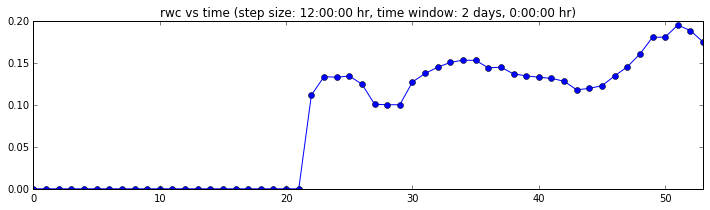

In [17]:
pd.Series(rwc_list).plot(style='-o',
                         figsize=(12, 3),
                         title='rwc vs time (step size: {} hr, time window: {} hr)'.format(time_step,
                                                                                           time_window))
plt.savefig('figs/{}-rwc-vs-time.png'.format(dataset))

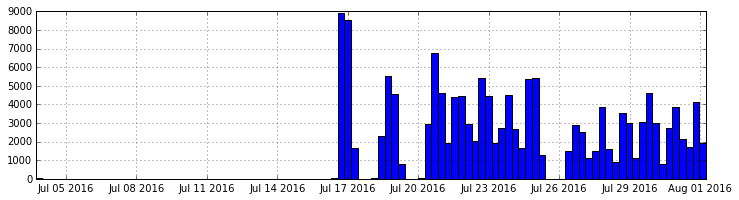

In [14]:
pd.Series(df.index).hist(bins=100, figsize=(12, 3))
plt.savefig('figs/{}-volume.png'.format(dataset))

In [ ]:
pd.Series(df.index).hist